<a href="https://colab.research.google.com/github/KOISSYK/machine-learning/blob/main/4_02%ED%99%95%EB%A5%A0%EC%A0%81%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **확률적 경사 하강법**

**SGDClassifier**

훈련 세트에서 샘플을 하나씩 꺼내 손실 함수의 경사를 따라 최적의 모델을 찾는 알고리즘이다. 샘플을 여러개씩 사용하면 미니배치 경사 하강법이고, 한번에 전체 샘플을 사용하면 배치 경사 하강법이다.



*   확률적 경사 하강법은 훈련 세트에서 랜덤하게 하나의 샘플을 선택하여 가파른 경사를 조금 내려간다. 이후 훈련세트에서 랜덤하게 또 다른 샘플을 하나 선택하여 경사를 조금 내려간다. 전체 샘플을 모두 사용하면 이 과정을 반복하는데, 훈련세트를 한번 모두 수행하는 과정을 에포크라고 한다. 보통 수십, 수백번 이상의 에포크를 진행한다.

*   미니배치 경사 하강법은 무작위로 몇 개의 샘플을 선택해서 경사를 내려간다.


*   배치경사 하강법은 전체 샘플을 사용하여 경사를 내려간다. 가장 안정적인 방법이지만 컴퓨터 자원을 많이 사용한다.





In [ ]:
import pandas as pd
fish = pd.read_csv('http://bit.ly/fish_csv_data')

In [ ]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
fish_input = fish[['Weight',	'Length',	'Diagonal',	'Height',	'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
#훈련데이터와 테스트 데이터 나누기
from sklearn.model_selection import train_test_split
train_input, test_input,train_target, test_target = train_test_split(
    fish_input,fish_target, random_state=42
)

In [ ]:
#특성을 표준화 전처리하기
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
# loss : 손실 함수의 종류 지정, max_iter : 수행할 에포크 횟수
sc = SGDClassifier(loss='log',max_iter=10,random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled,test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


결과를 보면 정확도가 낮게 나왔다. 에포크 10번이 작다는걸 예측 할 수 있다.

**에포크를 한번 더 실행하여 훈련하기**


***모델을 이어서 훈련할 때는 partial_fit() 메서드를 사용한다.***









In [ ]:
sc.partial_fit(train_scaled,train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled,test_target))

0.8151260504201681
0.85


에포크를 한번 더 실행하니 정확도가 향상되었다.

In [ ]:
sc.partial_fit(train_scaled,train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled,test_target))

0.9411764705882353
0.925


한번 더 실행 하니 정확도가 더 향상되었다.

In [ ]:
sc.partial_fit(train_scaled,train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled,test_target))

0.9495798319327731
0.925


In [ ]:
sc.partial_fit(train_scaled,train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled,test_target))

0.9495798319327731
0.925


더이상 정확도가 향상되지 않는것을 보니 30번의 에포크가 적당한것을 예측할수있었다.

>에포크와 과대/과소적합


에포크 횟수가 적어 모델이 훈련세트를 덜 학습하면 과소적합, 너무 많은 에포크 횟수는 과대적합된 모델일 가능성이 있다.

In [ ]:
import numpy as np

In [ ]:
sc = SGDClassifier(loss='log',random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)  # 7개의 생선의 종류
#partial_fit() 메서드만 사용하려면 훈련 세트의 전체클래스의 레이블을 전달해 주어야 함

각 횟수별로 훈련세트와 테스트세트의 점수를 train_score test_score 리스트에 넣는다.



In [ ]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

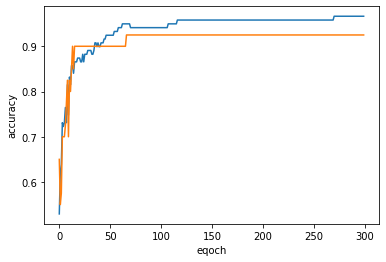

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('eqoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [ ]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


그래프에 따라서 에포크 횟수 100번 정도가 적절한 반복 횟수임을 알 수 있다.

** *SGBClassifier 는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춘다. tol 매개변수에서 향상될 최솟값을 지정할 수 있는데, None 이라면 자동으로 멈추지 않고 max_iter 만큼 무조건 반복한다.
sc = SGDClassifier(loss='log', max_iter=100, tol=None)* **

loss 매개변수의 기본값은 hinge 이며 , 힌지 손실은 서포트 벡터 머신 알고리즘을 위한 손실 함수이다.